## ENDER implementation runtime testing
### Test done on the endometriosis dataset

6 versions:
- basic Python (Base)
- compiled basic Python (-)
- modified for Cython (Modified)
- modified for Cython with parallelism (ModifiedPara)
- cythonized and using the lower bound (BoundedFast)
- cythonized and using the lower bound and parallelism (BoundedFastPara)

Every version also tested in 2 variants, either using just the gradient, or the gradient and the hessian to calculate the risk

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/iwama/Desktop/Osobiste/MSc/put-msc/Endometriosis/endometriosis.csv")
X = df.drop(columns=['target'])
y = df['target'].astype('int')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=4, random_state=42, stratify=y)

In [2]:
from EnderClassifierBase import EnderClassifier as ECBase
from EnderClassifier import EnderClassifier as EC
from EnderClassifierModified import EnderClassifier as ECM
from EnderClassifierModifiedPara import EnderClassifier as ECMP
from EnderClassifierBoundedFast import EnderClassifier as ECBF
from EnderClassifierBoundedFastPara import EnderClassifier as ECBFP

print(X_train.shape, y_train.shape)
N_RULES = 50

(870, 85) (870,)


The test is to see how long it takes to train 50 rules on the same data.

In [3]:
ecbaseTrueTimes = []
ecbaseTrueTotalTimes = []
ecbaseTrueTotal = 0
for i in range(5):
    ecbaseTrue = ECBase(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecbaseTrue.fit(X_train, y_train)
    ecbaseTrueTimes.append(times)
    ecbaseTrueTotalTimes.append(totalTimes)
    ecbaseTrueTotal += total
ecbaseTrueTimes = np.mean(np.array(ecbaseTrueTimes), axis=0)
ecbaseTrueTotalTimes = np.mean(np.array(ecbaseTrueTotalTimes), axis=0)
ecbaseTrueTotal = ecbaseTrueTotal / 5.0

In [4]:
ecbaseFalseTimes = []
ecbaseFalseTotalTimes = []
ecbaseFalseTotal = 0
for i in range(5):
    ecbaseFalse = ECBase(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecbaseFalse.fit(X_train, y_train)
    ecbaseFalseTimes.append(times)
    ecbaseFalseTotalTimes.append(totalTimes)
    ecbaseFalseTotal += total
ecbaseFalseTimes = np.mean(np.array(ecbaseFalseTimes), axis=0)
ecbaseFalseTotalTimes = np.mean(np.array(ecbaseFalseTotalTimes), axis=0)
ecbaseFalseTotal = ecbaseFalseTotal / 5.0

In [5]:
ecTrueTimes = []
ecTrueTotalTimes = []
ecTrueTotal = 0
for i in range(5):
    ecTrue = EC(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecTrue.fit(X_train, y_train)
    ecTrueTimes.append(times)
    ecTrueTotalTimes.append(totalTimes)
    ecTrueTotal += total
ecTrueTimes = np.mean(np.array(ecTrueTimes), axis=0)
ecTrueTotalTimes = np.mean(np.array(ecTrueTotalTimes), axis=0)
ecTrueTotal = ecTrueTotal / 5.0

In [6]:
ecFalseTimes = []
ecFalseTotalTimes = []
ecFalseTotal = 0
for i in range(5):
    ecFalse = EC(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecFalse.fit(X_train, y_train)
    ecFalseTimes.append(times)
    ecFalseTotalTimes.append(totalTimes)
    ecFalseTotal += total
ecFalseTimes = np.mean(np.array(ecFalseTimes), axis=0)
ecFalseTotalTimes = np.mean(np.array(ecFalseTotalTimes), axis=0)
ecFalseTotal = ecFalseTotal / 5.0

In [7]:
ecmTrueTimes = []
ecmTrueTotalTimes = []
ecmTrueTotal = 0
for i in range(5):
    ecmTrue = ECM(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecmTrue.fit(X_train, y_train)
    ecmTrueTimes.append(times)
    ecmTrueTotalTimes.append(totalTimes)
    ecmTrueTotal += total
ecmTrueTimes = np.mean(np.array(ecmTrueTimes), axis=0)
ecmTrueTotalTimes = np.mean(np.array(ecmTrueTotalTimes), axis=0)
ecmTrueTotal = ecmTrueTotal / 5.0

In [8]:
ecmFalseTimes = []
ecmFalseTotalTimes = []
ecmFalseTotal = 0
for i in range(5):
    ecmFalse = ECM(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecmFalse.fit(X_train, y_train)
    ecmFalseTimes.append(times)
    ecmFalseTotalTimes.append(totalTimes)
    ecmFalseTotal += total
ecmFalseTimes = np.mean(np.array(ecmFalseTimes), axis=0)
ecmFalseTotalTimes = np.mean(np.array(ecmFalseTotalTimes), axis=0)
ecmFalseTotal = ecmFalseTotal / 5.0

In [9]:
ecmpTrueTimes = []
ecmpTrueTotalTimes = []
ecmpTrueTotal = 0
for i in range(5):
    ecmpTrue = ECMP(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecmpTrue.fit(X_train, y_train)
    ecmpTrueTimes.append(times)
    ecmpTrueTotalTimes.append(totalTimes)
    ecmpTrueTotal += total
ecmpTrueTimes = np.mean(np.array(ecmpTrueTimes), axis=0)
ecmpTrueTotalTimes = np.mean(np.array(ecmpTrueTotalTimes), axis=0)
ecmpTrueTotal = ecmpTrueTotal / 5.0

In [10]:
ecmpFalseTimes = []
ecmpFalseTotalTimes = []
ecmpFalseTotal = 0
for i in range(5):
    ecmpFalse = ECMP(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecmpFalse.fit(X_train, y_train)
    ecmpFalseTimes.append(times)
    ecmpFalseTotalTimes.append(totalTimes)
    ecmpFalseTotal += total
ecmpFalseTimes = np.mean(np.array(ecmpFalseTimes), axis=0)
ecmpFalseTotalTimes = np.mean(np.array(ecmpFalseTotalTimes), axis=0)
ecmpFalseTotal = ecmpFalseTotal / 5.0

In [11]:
ecbfTrueTimes = []
ecbfTrueTotalTimes = []
ecbfTrueTotal = 0
for i in range(5):
    ecbfTrue = ECBF(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecbfTrue.fit(X_train, y_train)
    ecbfTrueTimes.append(times)
    ecbfTrueTotalTimes.append(totalTimes)
    ecbfTrueTotal += total
ecbfTrueTimes = np.mean(np.array(ecbfTrueTimes), axis=0)
ecbfTrueTotalTimes = np.mean(np.array(ecbfTrueTotalTimes), axis=0)
ecbfTrueTotal = ecbfTrueTotal / 5.0

In [12]:
ecbfFalseTimes = []
ecbfFalseTotalTimes = []
ecbfFalseTotal = 0
for i in range(5):
    ecbfFalse = ECBF(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecbfFalse.fit(X_train, y_train)
    ecbfFalseTimes.append(times)
    ecbfFalseTotalTimes.append(totalTimes)
    ecbfFalseTotal += total
ecbfFalseTimes = np.mean(np.array(ecbfFalseTimes), axis=0)
ecbfFalseTotalTimes = np.mean(np.array(ecbfFalseTotalTimes), axis=0)
ecbfFalseTotal = ecbfFalseTotal / 5.0

In [13]:
ecbfpTrueTimes = []
ecbfpTrueTotalTimes = []
ecbfpTrueTotal = 0
for i in range(5):
    ecbfpTrue = ECBFP(verbose=False, n_rules=N_RULES, use_gradient=True)
    times, totalTimes, total = ecbfpTrue.fit(X_train, y_train)
    ecbfpTrueTimes.append(times)
    ecbfpTrueTotalTimes.append(totalTimes)
    ecbfpTrueTotal += total
ecbfpTrueTimes = np.mean(np.array(ecbfpTrueTimes), axis=0)
ecbfpTrueTotalTimes = np.mean(np.array(ecbfpTrueTotalTimes), axis=0)
ecbfpTrueTotal = ecbfpTrueTotal / 5.0

In [23]:
ecbfpTrue = ECM(verbose=True, n_rules=1, use_gradient=True)
times, totalTimes, total = ecbfpTrue.fit(X_train, y_train)

Default rule creation time: 0.00356 seconds
Default rule: [np.float64(0.635930190594788), np.float64(-0.635930190594788)]
####################################################################################
Rule: 1
	sex_pain_level in [-1e+308, 3.5]
	defecation_blood_during in [0.5, 1e+308]
	height in [-1e+308, 179.0]
	menstruation_lenght in [-1e+308, 27.0]
	birth_weight in [-1e+308, 4540.0]
	defecation_pain_during in [-1e+308, 1.5]
	hormonal_birthcontrol in [0.5, 1e+308]
	first_menstruation in [-1e+308, 17.5]
	sciatica_pain_apart in [0.5, 1e+308]
	menstruation_pain in [-1e+308, 9.5]
	bowel_movement_apart in [0.5, 1e+308]
	toparm_pain_during in [0.5, 1e+308]
	alcohol_units in [-1e+308, 11.7]
	spotting in [0.5, 1e+308]
	stomach_ache_apart in [0.5, 1e+308]
	stomach_cramps_during in [0.5, 1e+308]
	smoking_time in [-9.5, 1e+308]
=> vote for class 0 with weight 0.46263783819720544
[np.float64(0.46263783819720544), np.float64(-0.46263783819720544)]

Rule 1 creation time: 0.01888 seconds, tota

In [24]:
ecbfpTrue = ECMP(verbose=True, n_rules=1, use_gradient=True)
times, totalTimes, total = ecbfpTrue.fit(X_train, y_train)

Default rule creation time: 0.00238 seconds
Default rule: [np.float64(0.635930190594788), np.float64(-0.635930190594788)]
####################################################################################
Rule: 1
	sex_pain_level in [-1e+308, 3.5]
	defecation_blood_during in [0.5, 1e+308]
	height in [-1e+308, 179.0]
	menstruation_lenght in [-1e+308, 27.0]
	birth_weight in [-1e+308, 4540.0]
	defecation_pain_during in [-1e+308, 1.5]
	hormonal_birthcontrol in [0.5, 1e+308]
	first_menstruation in [-1e+308, 17.5]
	sciatica_pain_apart in [0.5, 1e+308]
	menstruation_pain in [-1e+308, 9.5]
	bowel_movement_apart in [0.5, 1e+308]
	toparm_pain_during in [0.5, 1e+308]
	alcohol_units in [-1e+308, 11.7]
	spotting in [0.5, 1e+308]
	stomach_ache_apart in [0.5, 1e+308]
	stomach_cramps_during in [0.5, 1e+308]
	smoking_time in [-9.5, 1e+308]
=> vote for class 0 with weight 0.46263783819720544
[np.float64(0.46263783819720544), np.float64(-0.46263783819720544)]

Rule 1 creation time: 0.01238 seconds, tota

In [14]:
ecbfpFalseTimes = []
ecbfpFalseTotalTimes = []
ecbfpFalseTotal = 0
for i in range(5):
    ecbfpFalse = ECBFP(verbose=False, n_rules=N_RULES, use_gradient=False)
    times, totalTimes, total = ecbfpFalse.fit(X_train, y_train)
    ecbfpFalseTimes.append(times)
    ecbfpFalseTotalTimes.append(totalTimes)
    ecbfpFalseTotal += total
ecbfpFalseTimes = np.mean(np.array(ecbfpFalseTimes), axis=0)
ecbfpFalseTotalTimes = np.mean(np.array(ecbfpFalseTotalTimes), axis=0)
ecbfpFalseTotal = ecbfpFalseTotal / 5.0

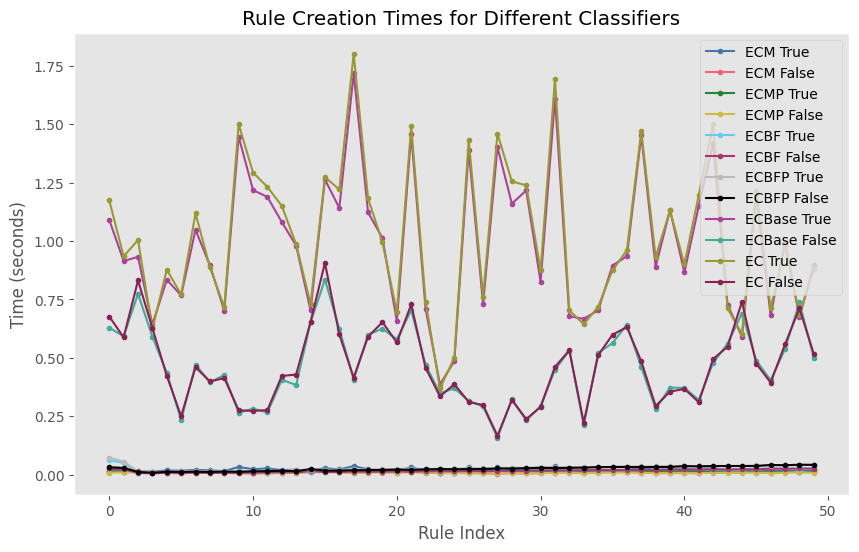

In [48]:
# plot the Rule creation times
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    "#4477AA", "#EE6677", "#228833", "#CCBB44",
    "#66CCEE", "#AA3377", "#BBBBBB", "#000000",
    "#AA4499", "#44AA99", "#999933", "#882255"
])
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTimes, label='ECM True', marker='.')
plt.plot(ecmFalseTimes, label='ECM False', marker='.')
plt.plot(ecmpTrueTimes, label='ECMP True', marker='.')
plt.plot(ecmpFalseTimes, label='ECMP False', marker='.')
plt.plot(ecbfTrueTimes, label='ECBF True', marker='.')
plt.plot(ecbfFalseTimes, label='ECBF False', marker='.')
plt.plot(ecbfpTrueTimes, label='ECBFP True', marker='.')
plt.plot(ecbfpFalseTimes, label='ECBFP False', marker='.')
plt.plot(ecbaseTrueTimes, label='ECBase True', marker='.')
plt.plot(ecbaseFalseTimes, label='ECBase False', marker='.')
plt.plot(ecTrueTimes, label='EC True', marker='.')
plt.plot(ecFalseTimes, label='EC False', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Time (seconds)')
plt.title('Rule Creation Times for Different Classifiers')
plt.grid()
plt.show()

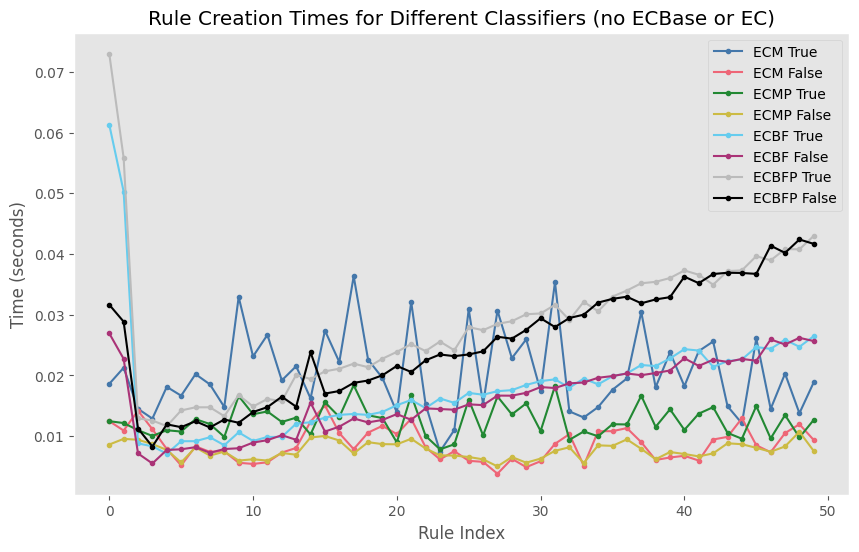

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTimes, label='ECM True', marker='.')
plt.plot(ecmFalseTimes, label='ECM False', marker='.')
plt.plot(ecmpTrueTimes, label='ECMP True', marker='.')
plt.plot(ecmpFalseTimes, label='ECMP False', marker='.')
plt.plot(ecbfTrueTimes, label='ECBF True', marker='.')
plt.plot(ecbfFalseTimes, label='ECBF False', marker='.')
plt.plot(ecbfpTrueTimes, label='ECBFP True', marker='.')
plt.plot(ecbfpFalseTimes, label='ECBFP False', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Time (seconds)')
plt.title('Rule Creation Times for Different Classifiers (no ECBase or EC)')
plt.grid()
plt.show()

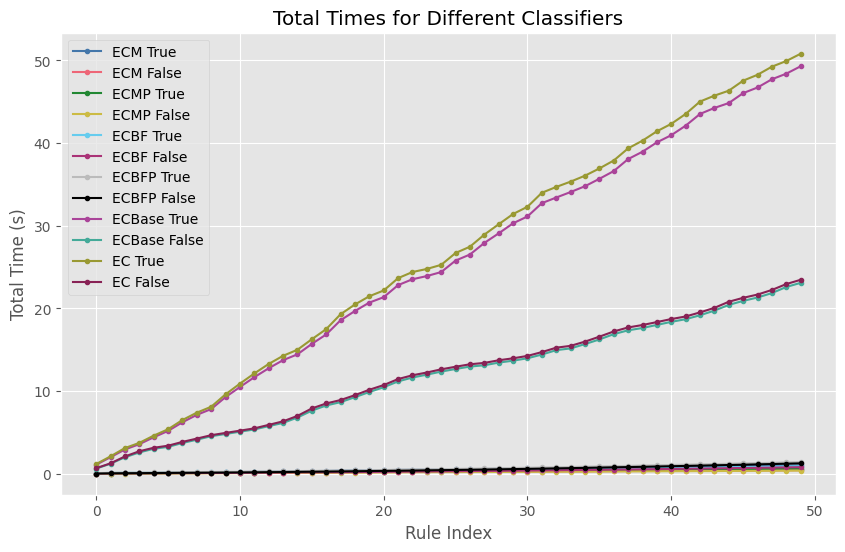

In [50]:
# same plot but for total times
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTotalTimes, label='ECM True', marker='.')
plt.plot(ecmFalseTotalTimes, label='ECM False', marker='.')
plt.plot(ecmpTrueTotalTimes, label='ECMP True', marker='.')
plt.plot(ecmpFalseTotalTimes, label='ECMP False', marker='.')
plt.plot(ecbfTrueTotalTimes, label='ECBF True', marker='.')
plt.plot(ecbfFalseTotalTimes, label='ECBF False', marker='.')
plt.plot(ecbfpTrueTotalTimes, label='ECBFP True', marker='.')
plt.plot(ecbfpFalseTotalTimes, label='ECBFP False', marker='.')
plt.plot(ecbaseTrueTotalTimes, label='ECBase True', marker='.')
plt.plot(ecbaseFalseTotalTimes, label='ECBase False', marker='.')
plt.plot(ecTrueTotalTimes, label='EC True', marker='.')
plt.plot(ecFalseTotalTimes, label='EC False', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Total Time (s)')
plt.title('Total Times for Different Classifiers')
plt.show()

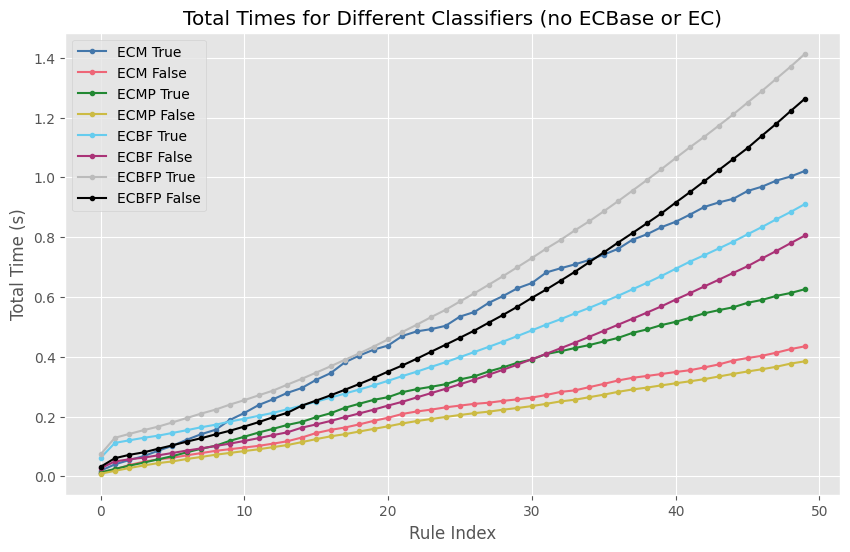

In [54]:
# same but without ecbase
plt.figure(figsize=(10, 6))
plt.plot(ecmTrueTotalTimes, label='ECM True', marker='.')
plt.plot(ecmFalseTotalTimes, label='ECM False', marker='.')
plt.plot(ecmpTrueTotalTimes, label='ECMP True', marker='.')
plt.plot(ecmpFalseTotalTimes, label='ECMP False', marker='.')
plt.plot(ecbfTrueTotalTimes, label='ECBF True', marker='.')
plt.plot(ecbfFalseTotalTimes, label='ECBF False', marker='.')
plt.plot(ecbfpTrueTotalTimes, label='ECBFP True', marker='.')
plt.plot(ecbfpFalseTotalTimes, label='ECBFP False', marker='.')
plt.legend()
plt.xlabel('Rule Index')
plt.ylabel('Total Time (s)')
plt.title('Total Times for Different Classifiers (no ECBase or EC)')
plt.show()

In [52]:
# Prepare data for the table
algorithms = [
    ("ECBase", ecbaseTrueTotal, ecbaseFalseTotal),
    ("EC", ecTrueTotal, ecFalseTotal),
    ("ECM", ecmTrueTotal, ecmFalseTotal),
    ("ECMP", ecmpTrueTotal, ecmpFalseTotal),
    ("ECBF", ecbfTrueTotal, ecbfFalseTotal),
    ("ECBFP", ecbfpTrueTotal, ecbfpFalseTotal)
]

table_df = pd.DataFrame(
    [(name, true, false) for name, true, false in algorithms],
    columns=["Version", "use_gradient=True", "use_gradient=False"]
).set_index("Version")

table_df


,use_gradient=True,use_gradient=False
Version,,
ECBase,49.311191,23.113089
EC,50.827204,23.481131
ECM,1.037007,0.449664
ECMP,0.649400,0.410126
ECBF,0.927806,0.820603
ECBFP,1.436917,1.289046
